In [4]:
import pandas as pd

df = pd.read_csv('BP_data.csv')
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [5]:
# df = df.drop(columns=['Pregnancy'])
# df = df.dropna()
df['Pregnancy'] = df['Pregnancy'].fillna(0)
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].mean())
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean())
print(df.isna().sum())

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


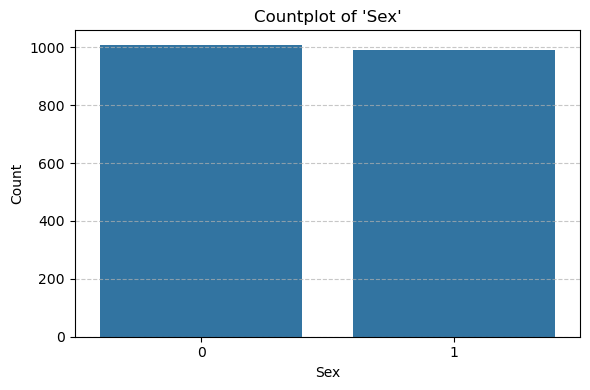

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def countplot_column(df, column, figsize=(6, 4), title=None, rotation=0, order=None):
    """
    특정 컬럼의 값을 countplot으로 시각화하는 함수

    Parameters:
    - df: pandas DataFrame
    - column: 시각화할 컬럼 이름 (문자열)
    - figsize: 그래프 크기
    - title: 그래프 제목 (기본값: 컬럼 이름)
    - rotation: x축 라벨 회전 각도 (기본값: 0)
    - order: 카테고리 순서 지정 (리스트)
    """
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column, order=order)
    plt.title(title or f"Countplot of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=rotation)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

countplot_column(df, 'Sex')

🎯 Boxplot 범위 for 'Physical_activity':
  Q1 (25%): 13605.75
  Q3 (75%): 37382.25
  IQR: 23776.50
  Lower Bound (이상치 기준): -22059.00
  Upper Bound (이상치 기준): 73047.00


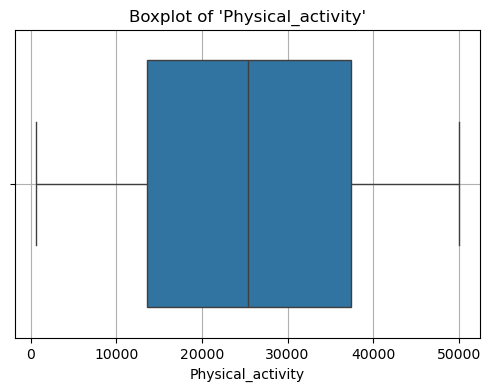

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def boxplot_column(df, column, show_range=True, figsize=(6, 4), title=None):
    """
    특정 컬럼에 대해 Boxplot을 시각화하고 범위를 출력하는 함수

    Parameters:
    - df: pandas DataFrame
    - column: 시각화할 컬럼 이름 (문자열)
    - show_range: 사분위수 및 이상치 경계 출력 여부 (기본값 True)
    - figsize: Boxplot 크기
    - title: 그래프 제목 (기본값 컬럼 이름)
    """
    values = df[column].dropna()

    # 사분위수 계산
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    if show_range:
        print(f"🎯 Boxplot 범위 for '{column}':")
        print(f"  Q1 (25%): {q1:.2f}")
        print(f"  Q3 (75%): {q3:.2f}")
        print(f"  IQR: {iqr:.2f}")
        print(f"  Lower Bound (이상치 기준): {lower_bound:.2f}")
        print(f"  Upper Bound (이상치 기준): {upper_bound:.2f}")

    # Boxplot 시각화
    plt.figure(figsize=figsize)
    sns.boxplot(x=values)
    plt.title(title or f"Boxplot of '{column}'")
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

boxplot_column(df,'Physical_activity')

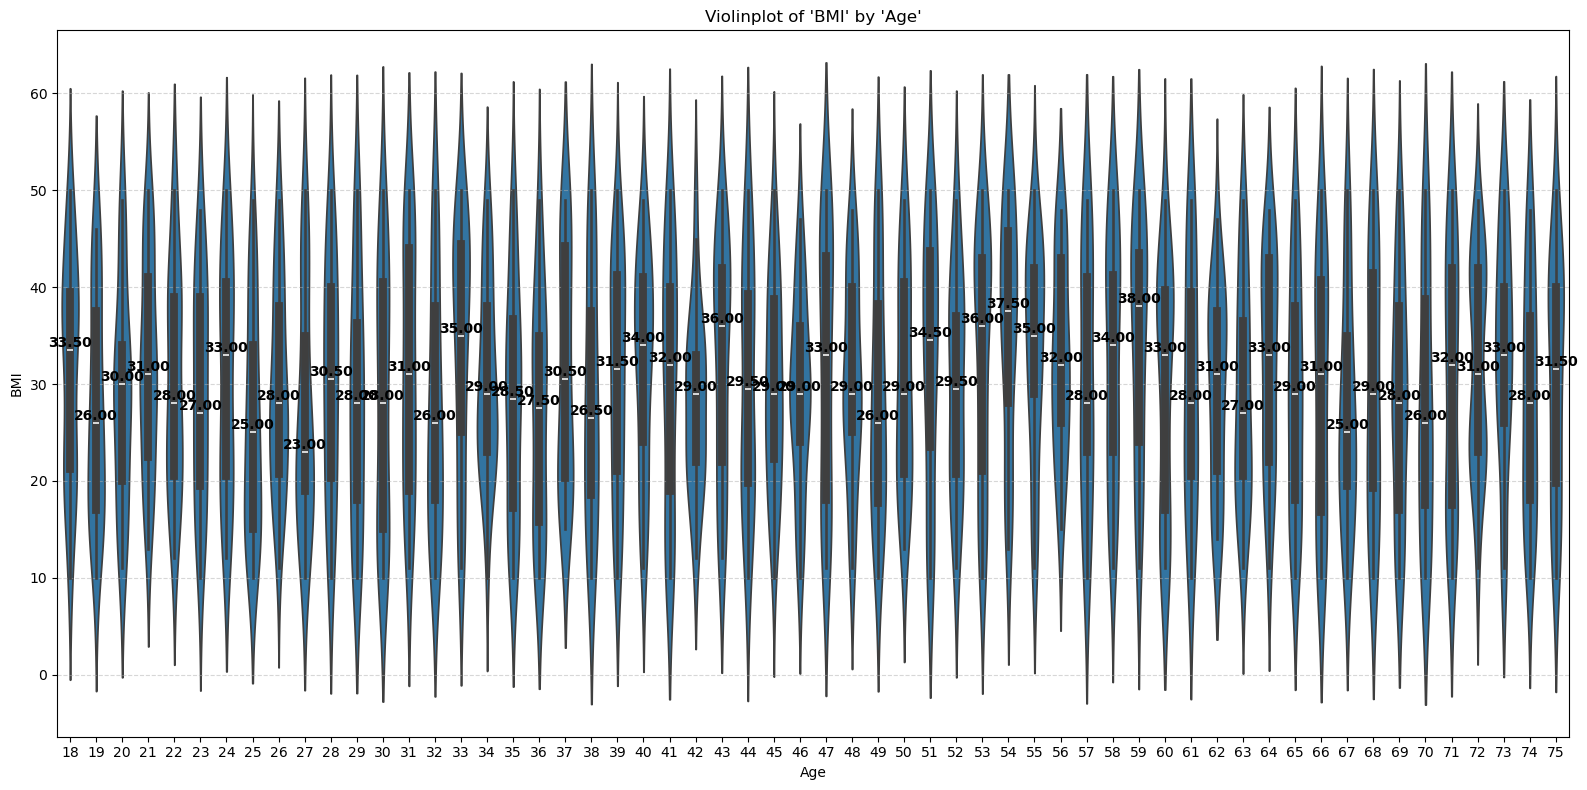

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def violinplot_with_labels(df, x_col, y_col, figsize=(16, 8), title=None, show_values=True, rotation=0):
    """
    범주형 컬럼(x_col)에 따라 수치형 컬럼(y_col)의 violinplot을 그리고,
    각 그룹 위에 중앙값을 표시하는 함수

    Parameters:
    - df: pandas DataFrame
    - x_col: 범주형 컬럼 (X축)
    - y_col: 수치형 컬럼 (Y축)
    - figsize: 그래프 크기
    - title: 그래프 제목
    - show_values: 중앙값을 violin 위에 표시할지 여부
    - rotation: x축 라벨 회전
    """
    plt.figure(figsize=figsize)
    ax = sns.violinplot(data=df, x=x_col, y=y_col, inner='box')  # box도 함께 보여주기
    plt.title(title or f"Violinplot of '{y_col}' by '{x_col}'")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.xticks(rotation=rotation)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    if show_values:
        medians = df.groupby(x_col)[y_col].median()
        for i, median in enumerate(medians):
            ax.text(i, median, f'{median:.2f}', ha='center', va='bottom', fontweight='bold', color='black')

    plt.tight_layout()
    plt.show()

violinplot_with_labels(df, 'Age','BMI')

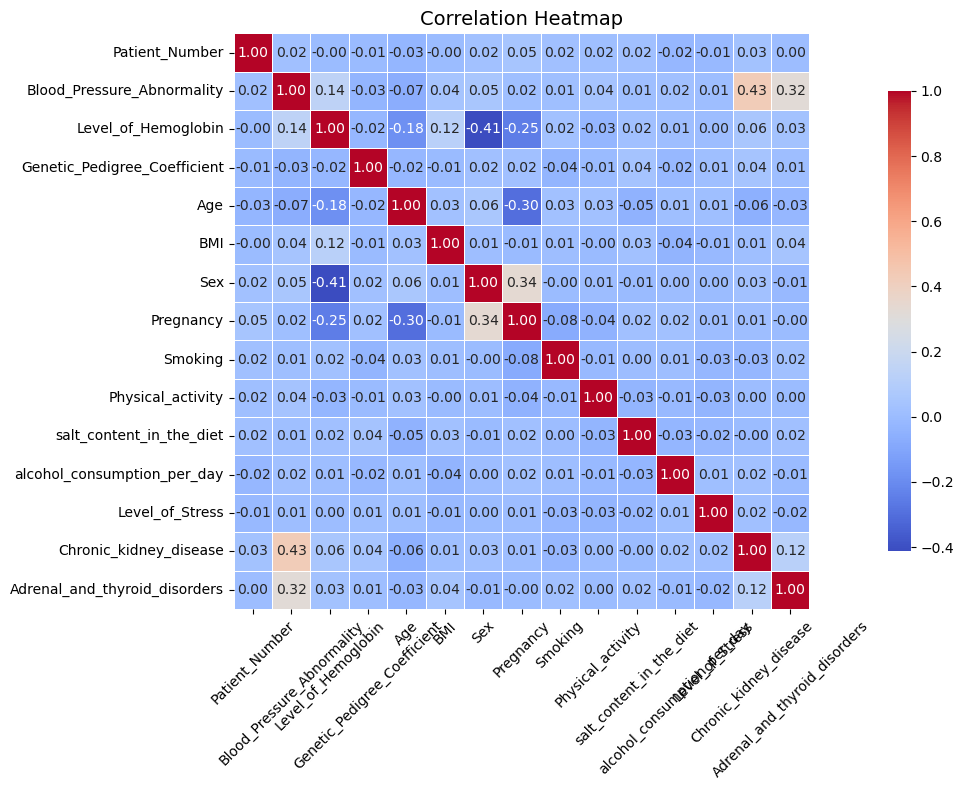

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def correlation_heatmap(df, cols=None, annot=True, figsize=(16, 8), cmap='coolwarm', title='Correlation Heatmap'):
    """
    여러 수치형 컬럼 간의 상관관계를 heatmap으로 시각화하는 함수

    Parameters:
    - df: pandas DataFrame
    - cols: 시각화할 컬럼 리스트 (None이면 모든 수치형 컬럼 사용)
    - annot: 각 셀에 수치 표시 여부
    - figsize: 그래프 크기
    - cmap: 색상 테마 (예: 'coolwarm', 'viridis', 'YlGnBu' 등)
    - title: 그래프 제목
    """
    if cols is not None:
        corr = df[cols].corr()
    else:
        corr = df.corr(numeric_only=True)

    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

correlation_heatmap(df)

In [15]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

C:\Users\jshan\AppData\Local\Temp\ipykernel_5428\785968529.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='Sex', y='Level_of_Stress', inner='box', palette='Set2')


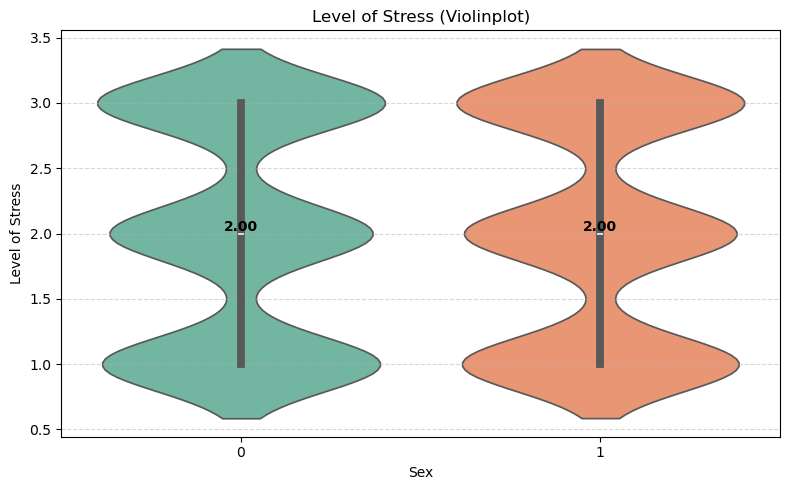

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stress_by_gender(df, figsize=(8, 5), show_median=True):
    """
    남녀에 따른 스트레스 수준 분포를 Violinplot으로 시각화

    Parameters:
    - df: pandas DataFrame
    - figsize: 그래프 크기
    - show_median: 각 성별별 중앙값 표시 여부
    """
    plt.figure(figsize=figsize)
    ax = sns.violinplot(data=df, x='Sex', y='Level_of_Stress', inner='box', palette='Set2')
    plt.title("Level of Stress (Violinplot)")
    plt.xlabel("Sex")
    plt.ylabel("Level of Stress")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # 중앙값 표시
    if show_median:
        medians = df.groupby('Sex')['Level_of_Stress'].median()
        for i, median in enumerate(medians):
            ax.text(i, median, f'{median:.2f}', ha='center', va='bottom', fontweight='bold', color='black')

    plt.tight_layout()
    plt.show()

plot_stress_by_gender(df)

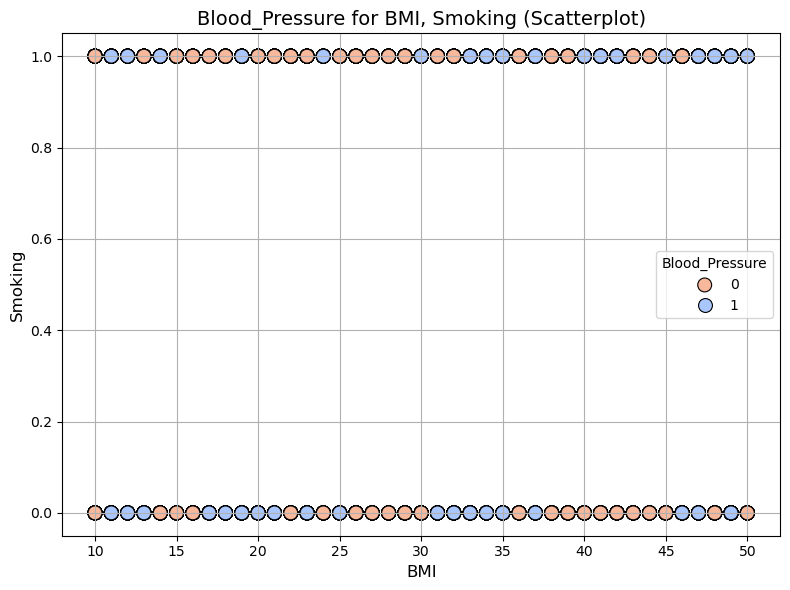

In [24]:
# BMI Smoking에 따라 고혈압인지 scatter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def scatterplot_bmi_smoking_vs_hypertension(df, figsize=(8, 6)):
    """
    BMI와 Smoking에 따른 고혈압 여부를 Scatterplot으로 시각화

    Parameters:
    - df: pandas DataFrame
    - figsize: 그래프 크기
    """
    plt.figure(figsize=figsize)
    
    # 'Blood_Pressure_Abnormality'가 고혈압 여부라고 가정 (1: 고혈압, 0: 정상)
    sns.scatterplot(data=df, x='BMI', y='Smoking', hue='Blood_Pressure_Abnormality', palette='coolwarm', s=100, edgecolor='k')
    
    plt.title("Blood_Pressure for BMI, Smoking (Scatterplot)", fontsize=14)
    plt.xlabel("BMI", fontsize=12)
    plt.ylabel("Smoking", fontsize=12)
    plt.legend(title="Blood_Pressure", labels=["0", "1"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

scatterplot_bmi_smoking_vs_hypertension(df)

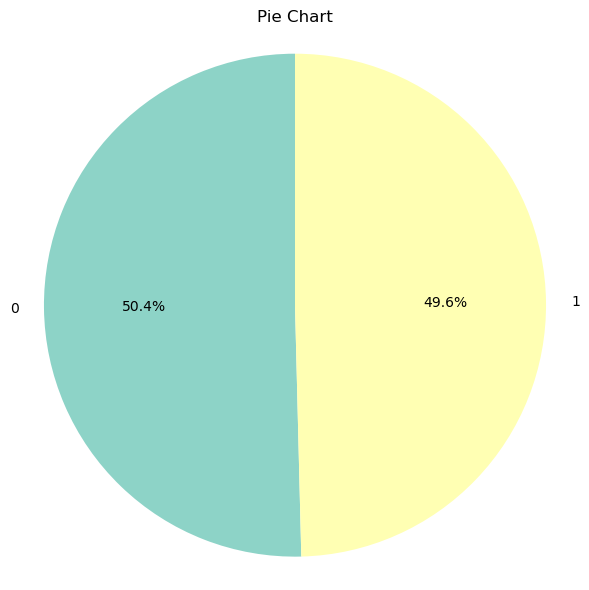

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_chart(df, column_name, title='Pie Chart', figsize=(6, 6)):
    """
    주어진 컬럼에 대해 Pie chart를 그리는 함수

    Parameters:
    - df: pandas DataFrame
    - column_name: Pie chart로 나타낼 컬럼 이름
    - title: 그래프 제목
    - figsize: 그래프 크기
    """
    # 해당 컬럼의 범주별 비율 계산
    category_counts = df[column_name].value_counts()

    # Pie chart 그리기
    plt.figure(figsize=figsize)
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(category_counts)))
    plt.title(title)
    plt.axis('equal')  # 원을 원형으로 맞추기
    plt.tight_layout()
    plt.show()

plot_pie_chart(df,'Sex')